In [1]:
import numpy as np 
import pandas as pd 
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
from fastai.basics import *
from fastai.callbacks import * 
import glob
import rawpy
import sys
from skimage.measure import compare_ssim, compare_psnr



In [2]:
from dirs import *

In [2]:
from SID_Unet_Model import *         #model classes
from SID_Dataset import *             #Pytorch DataSet

# Utils

In [3]:
#https://github.com/cydonia999/Learning_to_See_in_the_Dark_PyTorch/blob/master/utils.py

def get_psnr(im1, im2):
    return compare_psnr(im1, im2)

def get_ssim(im1, im2):
    return compare_ssim(im1, im2,data_range=1,  gaussian_weights=True, use_sample_covariance=False, multichannel=True)


# Test Preds

In [4]:
# placeholder datasets for fastai

train_ds = ImageDataset(train_ids[0:1])
val_ds = ImageDataset(val_ids[0:1])


In [5]:
# CUDA for PyTorch
use_cuda = torch.cuda.is_available()
device = torch.device("cpu")

criterion = nn.L1Loss()
net = Unet()
#net = Unet(pixel_shuffle_upsampling = True)

## test data

In [6]:
test_ds = ImageDataset(test_ids,test = True,transform= False)

In [12]:


databunch = DataBunch.create(train_ds,val_ds, test_ds, device=device, bs =1, num_workers = 0)
learn = Learner(databunch,net,callback_fns=[ShowGraph], loss_func = criterion)

learn.load('baseline');


We run on CPU because get_preds causes out of memory issue on GPU

In [ ]:
preds, target = learn.get_preds(ds_type=DatasetType.Test)


In [11]:
plt.rcParams['figure.figsize'] = [12,8]

In [12]:
img_num = 10   

input_path = get_paths_fns(test_ids[img_num])[0][0]

In [13]:
input_path

'./dataset/Sony/short/10045_00_0.04s.ARW'

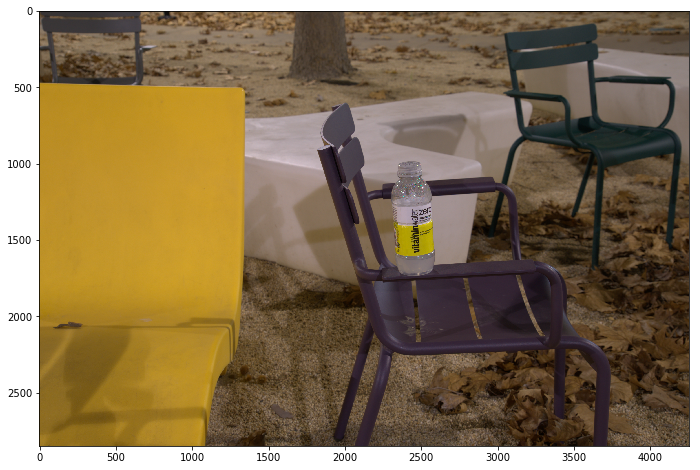

In [23]:
# ground truth image
plt.imshow(target[img_num].permute(1,2,0),)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


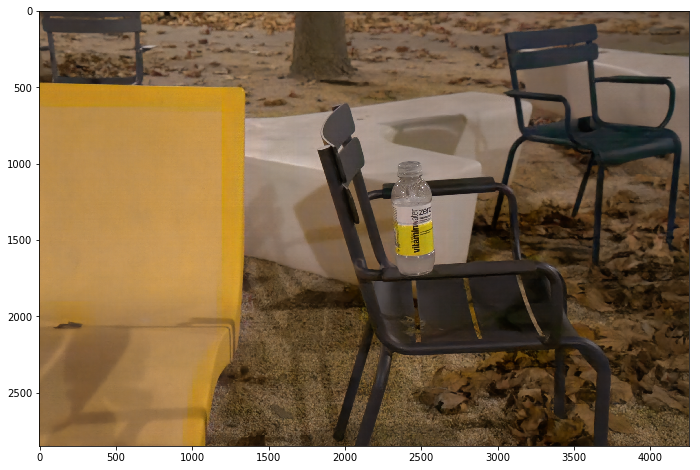

In [14]:
# Model output
plt.imshow(preds[img_num].permute(1,2,0))

In [15]:
# average pnsr and ssim (ssim takes a while)

pnsr_values= []
ssim_values = []

for i in range(len(preds)):

    pnsr = get_psnr(target[i].permute(1,2,0).numpy(), preds[i].permute(1,2,0).numpy())
    ssim = get_ssim(target[i].permute(1,2,0).numpy(), preds[i].permute(1,2,0).numpy())
    pnsr_values += [pnsr]
    ssim_values += [ssim]

In [2]:
np.mean(pnsr_values), np.mean(ssim_values)